In [175]:
import numpy as np
import pylab as plt
import scipy as sc
import pandas as pd
from PIL import Image
import sympy as sp

**PUNTO 2**

In [176]:
ff = lambda x: np.cos(np.exp(x) - 2) - (np.exp(x) - 2)

bi, ne, fi = sc.optimize.bisect(ff,0,2), sc.optimize.newton(ff,1.2), float(sc.optimize.fixed_point(ff,2))

print('Las raices con el metodo de biyeccion, newton y punto fijo son: '+str(bi)+', '+str(ne)+', '+str(fi)+' respectivamente')

Las raices con el metodo de biyeccion, newton y punto fijo son: 1.0076239716563578, 1.0076239716581368, 0.786144927673003 respectivamente


**PUNTO 3**

*3.1*

In [177]:
# Posicion en x
def pos_x(t, theta, alpha, v0, b, u, g):

  x = ((u*np.cos(alpha) * t) + (((v0*np.cos(theta) - u*np.cos(alpha)) / b) * ( 1 - np.exp(-b*t) )))

  return x

# Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  y = ((((g / b) + v0*np.sin(theta) - u*np.sin(alpha)) / b) * ( 1 - np.exp(-b*t) )) - (((g / b) - u*np.sin(alpha)) * t)

  return y

*3.2 & 3.3* 

In [178]:
def trayectoria(theta, alpha, v0, b, u,g):

  tv = sc.optimize.newton(pos_y, 12, args = (theta, alpha, v0, b, u, g) )
  T = np.arange(0,tv,0.008)
  x = pos_x(T, theta, alpha, v0, b, u,g)
  y = pos_y(T, theta, alpha, v0, b, u,g)

  dicc = { "X" : x , "Y" : y , "Tiempo" : T}
  df = pd.DataFrame(dicc)

  return df

In [179]:
# Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0 / 2         #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [180]:
trayectoria(theta, alpha, v0, b, u,g)

,X,Y,Tiempo
0,0.000000,0.000000,0.000
1,0.339295,0.339030,0.008
2,0.678359,0.677297,0.016
3,1.017191,1.014802,0.024
4,1.355792,1.351545,0.032
...,...,...,...
1009,238.879924,1.462633,8.072
1010,239.026842,1.168359,8.080
1011,239.173605,0.873577,8.088
1012,239.320214,0.578285,8.096


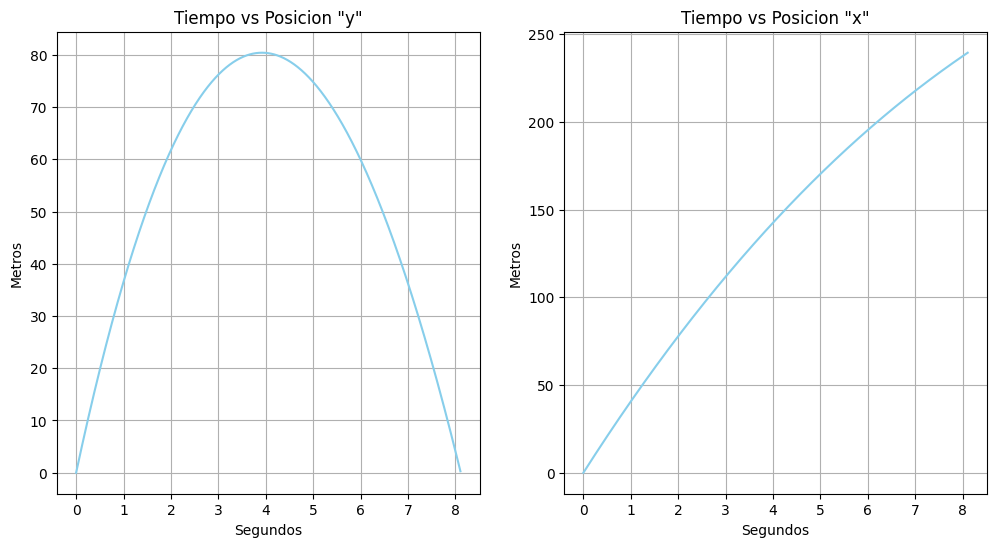

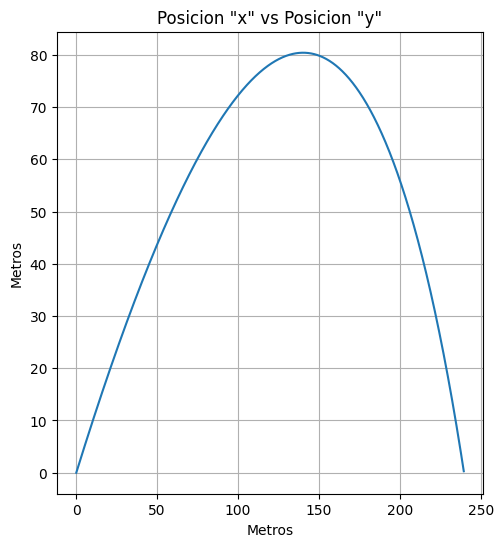

In [181]:
fig, asx = plt.subplots(1,2,figsize = (12,6))

asx[0].plot(trayectoria(theta, alpha, v0, b, u,g).Tiempo , trayectoria(theta, alpha, v0, b, u,g).Y, color = 'skyblue')
asx[0].set_xlabel('Segundos')
asx[0].set_ylabel('Metros')
asx[0].set_title('Tiempo vs Posicion "y"')
asx[0].grid(True)

asx[1].plot( trayectoria(theta, alpha, v0, b, u,g).Tiempo ,trayectoria(theta, alpha, v0, b, u,g).X, color = 'skyblue')
asx[1].set_ylabel('Metros')
asx[1].set_xlabel('Segundos')
asx[1].set_title('Tiempo vs Posicion "x"')
asx[1].grid(True)

plt.show()

plt.figure(figsize=(5.5, 6))
plt.plot(trayectoria(theta, alpha, v0, b, u,g).X , trayectoria(theta, alpha, v0, b, u,g).Y)
plt.xlabel('Metros')
plt.ylabel('Metros')
plt.title('Posicion "x" vs Posicion "y"')
plt.grid()

plt.show()

*3.4*

In [182]:
df = trayectoria(theta, alpha, v0, b, u,g).copy()
ultima_columna = df.shape[0] - 1
alcance = df.loc[ultima_columna, 'Tiempo']

print('el alcance maximo es: '+str(alcance) +" metros")

el alcance maximo es: 8.104000000000001 metros


*3.5*

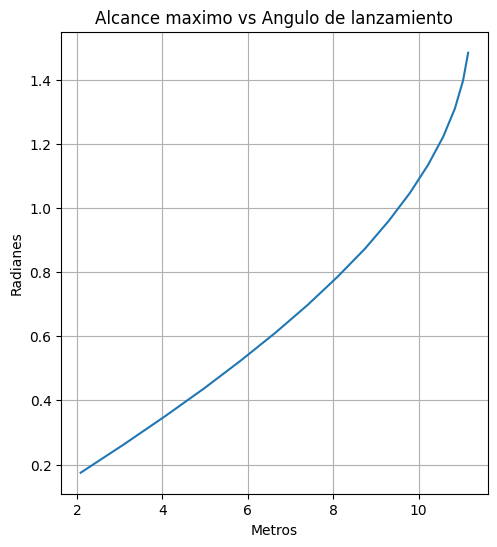

In [183]:
T = np.arange((10*np.pi)/180,((80 + 5)*np.pi)/180,(5*np.pi)/180)
A = np.zeros(len(T))
M = np.arange(0,len(T),1)

for m in M:

    dff = trayectoria(T[m], alpha, v0, b, u,g).copy()
    last_colum = dff.shape[0] - 1
    alcance_m = dff.loc[last_colum, 'Tiempo']
    A[m] = alcance_m
    
plt.figure(figsize=(5.5, 6))
plt.plot(A , T)
plt.xlabel('Metros')
plt.ylabel('Radianes')
plt.title('Alcance maximo vs Angulo de lanzamiento')
plt.grid()

plt.show()

**PUNTO 4**

In [184]:
Mt, Rt, r, R, p0, L = sp.symbols('Mt Rt r R p0 L')

M = 5.40*Mt 

p1 = p0 * sp.exp((-r)/L) 
p2 = r**2

p = p1 * p2
MM = 4*sp.pi * sp.integrate(p, (r, 0, R)) 

MMM = MM - M
MMM



-5.4*Mt + 4*pi*(2*L**3*p0 + (-2*L**3*p0 - 2*L**2*R*p0 - L*R**2*p0)*exp(-R/L))

In [190]:
Mt1 = 5.972 * (10**24)
M1 = 5.40 * Mt 
p01 = 18000
L1 = 6500

Suponiendo que la masa de la tierra es 1

In [195]:
Mt = 1
M = 5.40 * Mt
p0 = 18000 / 5.972 * (10**24)
L = 6500

El radio (suponiendo que la masa de la tierra es unitario) es: 0.059244829175213454


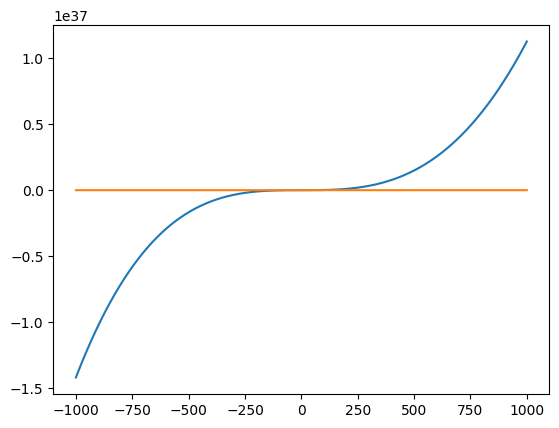

In [213]:
mm = lambda R: 4*np.pi * ( 2*(L**3)*p0 + (-1)*( 2*(L**3)*p0 + 2*(L**2)*R*p0 + L*(R**2)*p0)*np.exp( (-R)/L ) )
mmm = lambda R: M * (R**0)
m = lambda R: mm(R) - mmm(R) 

x = 1e3
X = np.arange(-x,x,0.01)

plt.plot(X, mm(X))
plt.plot(X, mmm(X))
mm(0)

print('El radio (suponiendo que la masa de la tierra es unitario) es: '+str(sc.optimize.bisect(m,-10,10)))

**PUNTO 5**

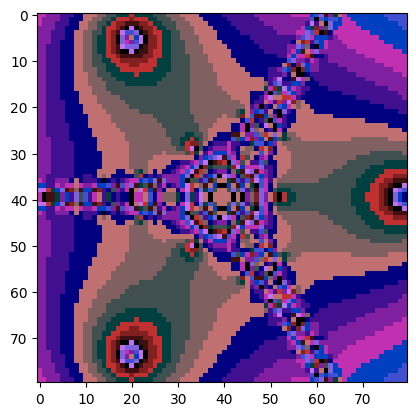

In [215]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)